Job Post Analysis and Report

In [211]:
# Import General Libraries
import pandas as pd 
import numpy as np 

# Import Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns 

## Loading Data

In [212]:
df = pd.read_csv(r'transformed_jobs_data.csv')
df.head(3)

,job_id,job_employment_type,job_title,job_apply_link,job_description,job_city,job_country,job_posted_at_timestamp,employer_website,employer_company_type
0,XX6946dvNO3187IkAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,• *Please note that our offices will be closed...,Montréal,CA,2023-12-19 20:22:04,NaN,NaN
1,6Wu7QcWfrhOR-THoAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,We are seeking an experienced and passionate D...,NaN,CA,2023-12-19 15:55:49,NaN,NaN
2,Oiu186OT5E6bkZReAAAAAA==,FULLTIME,"2024 RBCIS, Summer Co-op Data Engineer / Full ...",https://ca.linkedin.com/jobs/view/2024-rbcis-s...,Job Summary\n\nJob Description\n\nWhat is the ...,Toronto,CA,2023-12-19 22:30:06,http://www.rbc.com,Finance


In [213]:
# df['job_city'].unique()

In [214]:
# df.tail()

In [215]:
df.shape

(166, 10)

In [216]:
df.isnull().sum()

job_id                      0
job_employment_type         0
job_title                   0
job_apply_link              0
job_description             0
job_city                   38
job_country                 0
job_posted_at_timestamp     0
employer_website           53
employer_company_type      90
dtype: int64

In [217]:
# Function to format null values to 2dp
def formatt(x):
    return '{:.2f}%'.format(x)

((df.isnull().sum() / len(df)) * 100).apply(formatt)

job_id                      0.00%
job_employment_type         0.00%
job_title                   0.00%
job_apply_link              0.00%
job_description             0.00%
job_city                   22.89%
job_country                 0.00%
job_posted_at_timestamp     0.00%
employer_website           31.93%
employer_company_type      54.22%
dtype: object

- Presence of missing data in **THREE** columns namely:
    - job_city [22.89%]
    - employer_website [31.93%]
    - employer_company_type [54.22%]

- No duplicates.

In [218]:
# Drop job_city and employer_website column
df.drop('job_city', axis=1, inplace=True)
df.drop('employer_website', axis=1, inplace=True)

In [219]:
df_copy = df.copy()
df_copy.head(3)

,job_id,job_employment_type,job_title,job_apply_link,job_description,job_country,job_posted_at_timestamp,employer_company_type
0,XX6946dvNO3187IkAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,• *Please note that our offices will be closed...,CA,2023-12-19 20:22:04,NaN
1,6Wu7QcWfrhOR-THoAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,We are seeking an experienced and passionate D...,CA,2023-12-19 15:55:49,NaN
2,Oiu186OT5E6bkZReAAAAAA==,FULLTIME,"2024 RBCIS, Summer Co-op Data Engineer / Full ...",https://ca.linkedin.com/jobs/view/2024-rbcis-s...,Job Summary\n\nJob Description\n\nWhat is the ...,CA,2023-12-19 22:30:06,Finance


In [226]:
# Impute employer_company_type
# df.fillna(method='ffill', axis=1, inplace=True)
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='most_frequent')
si.fit(df[['employer_company_type']])

df[['employer_company_type']] = si.fit_transform(df[['employer_company_type']].values.reshape(-1,1))


### Exploratory Data Analysis

In [227]:
df.head(3)

,job_id,job_employment_type,job_title,job_apply_link,job_description,job_country,job_posted_at_timestamp,employer_company_type
0,XX6946dvNO3187IkAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,• *Please note that our offices will be closed...,CA,2023-12-19 20:22:04,Consulting
1,6Wu7QcWfrhOR-THoAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,We are seeking an experienced and passionate D...,CA,2023-12-19 15:55:49,Consulting
2,Oiu186OT5E6bkZReAAAAAA==,FULLTIME,"2024 RBCIS, Summer Co-op Data Engineer / Full ...",https://ca.linkedin.com/jobs/view/2024-rbcis-s...,Job Summary\n\nJob Description\n\nWhat is the ...,CA,2023-12-19 22:30:06,Finance


<Axes: xlabel='job_employment_type', ylabel='Count'>

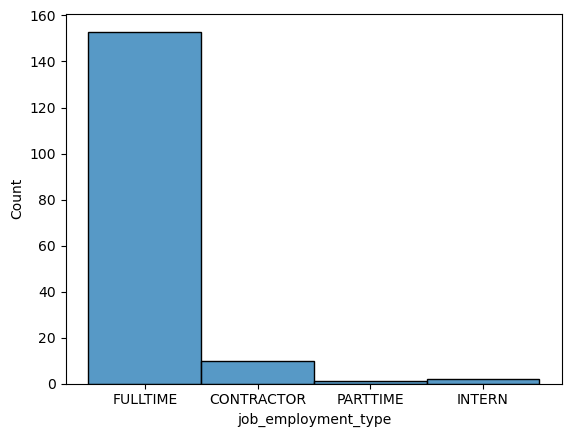

In [230]:
sns.histplot(data=df, x=df['job_employment_type'])

In [ ]:
# Impute missing job_city 
# modeCity = df.groupby('job_country')['job_city'].count().reset_index()
# modeCity.columns = ['job_country', 'job_city']
# modeCity

    

In [ ]:
# df.dtypes

In [ ]:
# Convert job_city to a categorical data
# df['job_city'] = df['job_city'].astype('category')

In [ ]:
# Label Encoding in Pandas
# df['Encoding_with_pandas'] = df['job_city'].cat.codes
# df.head(3)

In [ ]:
# # Label encoding using Scikit-Learn
# from sklearn.preprocessing import LabelEncoder

# # Create an instance
# label_encoder = LabelEncoder()

# # Fit LabelEncoder
# label_encoder.fit(df['job_city'])

# df['encoded_with_sklearn'] = label_encoder.transform(df['job_city'])

In [ ]:
# One Hot Encoding
# from sklearn.preprocessing import OneHotEncoder

# one_hot_encoder = OneHotEncoder()

# transformed_one_hot_encoding = one_hot_encoder.fit_transform(df[['job_city']])

# ohe_df = pd.DataFrame(transformed_one_hot_encoding.toarray(), dtype='int')
# ohe_df.head()

In [ ]:
# ohe_final_df = df.join(ohe_df)
# ohe_final_df

In [ ]:
# Generate OHE using pandas dummy
# dummy_df = pd.get_dummies(df['job_city'], prefix='job_city')
# dummy_df

In [ ]:
# dummy_df.style.applymap(lambda x: 'background-color: green' if x > 0 else 'background-color: yellow')

In [ ]:
# Function to fill missing volumes with the mode value of each city
# def fill_missing_city(df):
#     if np.isnan(df['job_city']):
#         return modeCity[modeCity['job_country'] == df['job_country']]['mode']
    
#     return df['job_city']

# df['job_city'] = df.apply(fill_missing_city, axis=1)

In [ ]:
# len(df['job_city'].unique())

In [ ]:
# imputer = SimpleImputer(strategy='most_frequent')
# imputer.fit_transform(df['job_city'])

In [ ]:
# Impute job_city using the most frequent value
# from sklearn.impute import SimpleImputer
# impute_mode = SimpleImputer(strategy='most_frequent')
# impute_mode.fit(df[['job_city']])

# df[['job_city']] = impute_mode.fit_transform(df[['job_city']].values.reshape(-1,1))
# df['job_city'].isna().sum()


In [ ]:
# Drop missing rows
# df_copy = df.copy()

# df_copy.dropna(inplace=True)

# df_copy.isna().sum()